## In This notebook,

We will extract the unique genres from the movies data set and plot them to see the most popular movie genres of all time

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

**Ensure your pandas version is atleaset 0.25**

otherwise you can't use the explode function

In [3]:
print(pd.__version__)

1.4.2


In [4]:
movies = pd.read_csv('data/movie.csv')
movies.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [5]:
# let's see the shape
movies.shape

(4916, 28)

In [4]:
# check for missing values in the genre-column
movies.genres.isna().sum()

0

In [6]:
# Let's see the genres
movies.genres.head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [7]:
movies.genres.dtype

dtype('O')

We can see that the `genre` column is object type or string. Our goal is to make each genre a unique column in the `movies` dataframe

First, we need to clean each string in the movie `genres` column, remove whitespace and replace any hyphens with underscores and make all genres small case for uniformity 

In [8]:
def clean_col(col, df=movies):
    """This function cleans each row of a 
        string column, by removing whitespace,
        and replacing hyphens and spaces with underscore,
        and making each genre small case
        
    @param col: a series obj of strings in df
    @param df: a pandas dataframe
    @return: None, cleans in place
    """
    
    df[col] = df[col].apply(lambda x: x.strip().lower().replace('-','_').replace(' ', '_'))
    
    print('Column Cleaned!')

In [9]:
clean_col('genres')

Column Cleaned!


In [10]:
# Let's see the genres
movies.genres.head()

0    action|adventure|fantasy|sci_fi
1           action|adventure|fantasy
2          action|adventure|thriller
3                    action|thriller
4                        documentary
Name: genres, dtype: object

Next, we will convert each row to a list of strings. Since each string is divided by a '|', we use that for the separation

In [11]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

In [12]:
# Let's see the genres
movies.genres.head()

0    [action, adventure, fantasy, sci_fi]
1            [action, adventure, fantasy]
2           [action, adventure, thriller]
3                      [action, thriller]
4                           [documentary]
Name: genres, dtype: object

Now that we have lists, we will explode into one series object and get the unique genres

In [13]:
genres_exploded = movies.explode('genres', ignore_index=True)

# Lets see shape
genres_exploded.shape

(14124, 28)

In [14]:
type(genres_exploded)

pandas.core.frame.DataFrame

*Now we can select the unique genres in descending order and plot it to to show the most popular gnres of all time*

In [21]:
genres = genres_exploded.groupby('genres').count()['color'].sort_values(ascending=False)

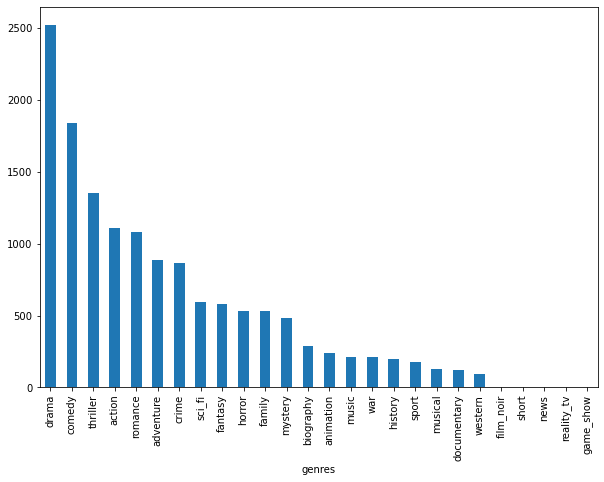

In [22]:
genres.plot(kind='bar', figsize=(10,7));

*Now let's select the unique genres from the exploded dataframe `genres` column*

In [23]:
unique_genres = genres_exploded.genres.unique()

# Let's see them
unique_genres

array(['action', 'adventure', 'fantasy', 'sci_fi', 'thriller',
       'documentary', 'romance', 'animation', 'comedy', 'family',
       'musical', 'mystery', 'western', 'drama', 'history', 'sport',
       'crime', 'horror', 'war', 'biography', 'music', 'game_show',
       'reality_tv', 'news', 'short', 'film_noir'], dtype=object)

In [24]:
# How many unique genres do we have

len(unique_genres)

26

In [28]:
# !jupyter nbconvert --execute --to pdf cleaning_and_splitting_movie_genres.ipynb